# Классификация дорожных объектов

Загрузка необходимых библиотек

In [1]:
import pandas as pd
pd.options.display.max_columns = 1000
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Открытие датасета

In [2]:
df = pd.read_csv('dfMoscow6.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [3]:
df

,Адрес,Район,Кол-во ДТП по данному адресу,Отношение кол-ва ДТП по данному адресу ко всем ДТП в Москве,Легкий,Тяжёлый,С погибшими,Иной вид ДТП,Наезд на велосипедиста,Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Опрокидывание,Падение пассажира,Столкновение,Съезд с дороги,Широта,Долгота,Среднее значение тяжести,Индекс
0,"г Москва, Московская кольцевая автомобильная д...",Чертаново Южное,14,0.000133,9,5,0,0,0,0,0,3,0,0,11,0,55.579467,37.583253,1.357143,19
1,"г Москва, ш Ярославское, 1",Ярославский,10,0.000095,100,13,6,0,1,24,16,2,2,8,66,0,55.871109,37.711612,1.210084,12
2,"г Москва, Московская кольцевая автомобильная д...",Восточное Измайлово,22,0.000210,17,3,2,2,0,1,3,6,0,1,9,0,55.800340,37.839965,1.318182,29
3,"г Москва, Московская кольцевая автомобильная д...",Строгино,20,0.000191,16,4,0,0,0,0,1,3,0,0,16,0,55.797798,37.380348,1.200000,24
4,"г Москва, ш Носовихинское, 1км",Новокосино,6,0.000057,5,0,1,0,0,0,1,1,0,0,4,0,55.744075,37.843950,1.333333,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,"г Балашиха, ул Звездная, 4",Балашиха,6,0.000057,4,2,0,0,1,5,0,0,0,0,0,0,55.821261,37.835578,1.333333,8
4077,"г Балашиха, А-103 Щелковское шоссе Москва - Ще...",Балашиха,10,0.000095,5,5,0,0,0,3,0,0,0,1,6,0,55.825600,37.890800,1.500000,15
4078,"г Балашиха, ул Текстильщиков, 15",Балашиха,7,0.000067,4,3,0,0,0,1,0,0,0,0,6,0,55.812436,37.965840,1.428571,10
4079,"г Балашиха, MКАД-ЖЕЛЕЗНОДОРОЖНЫЙ-ЛИКИНО-ДУЛЕВО...",Балашиха,8,0.000076,3,4,1,0,0,2,0,1,0,0,5,0,55.753091,38.096150,1.750000,14


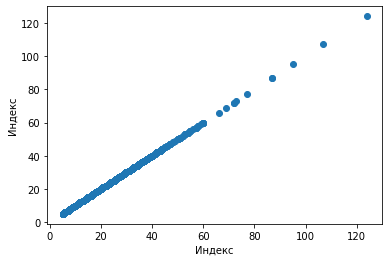

In [4]:
x_axis = df['Индекс']
y_axis = df['Индекс']

plt.xlabel('Индекс')
plt.ylabel('Индекс')
plt.scatter(x_axis, y_axis)
plt.show()

Посчитаем Квантиль 95%, чтобы выделить особо опасный класс, е=который требует перерегулирования

In [5]:
Q = df['Индекс'].quantile(0.9)

In [6]:
Q

25.0

В класс самых опасных дорог будут входить те догои, у которых Индекс будет больше или равен 24 (это 10% от всех аварийных участков по г. Москва)

In [7]:
df[(df['Индекс'] >=Q)]

,Адрес,Район,Кол-во ДТП по данному адресу,Отношение кол-ва ДТП по данному адресу ко всем ДТП в Москве,Легкий,Тяжёлый,С погибшими,Иной вид ДТП,Наезд на велосипедиста,Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Опрокидывание,Падение пассажира,Столкновение,Съезд с дороги,Широта,Долгота,Среднее значение тяжести,Индекс
2,"г Москва, Московская кольцевая автомобильная д...",Восточное Измайлово,22,0.000210,17,3,2,2,0,1,3,6,0,1,9,0,55.800340,37.839965,1.318182,29
8,"г Москва, км МКАД 33-й",Чертаново Южное,26,0.000248,24,18,2,1,0,5,4,5,1,0,28,0,55.576491,37.594275,1.500000,39
9,"г Москва, Московская кольцевая автомобильная д...",Ховрино,20,0.000191,14,5,1,0,0,0,0,6,2,0,12,0,55.882671,37.462311,1.350000,27
17,"г Москва, пр-кт Ленинский, 78",Ломоносовский,24,0.000229,8,12,4,0,0,19,0,0,0,2,3,0,55.682221,37.536389,1.833333,44
26,"г Москва, ш Пятницкое, 39",Митино,22,0.000210,17,5,0,0,0,6,0,0,0,0,16,0,55.855833,37.355350,1.227273,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,"г Балашиха, М-7 Волга Москва - Владимир - Нижн...",Балашиха,20,0.000191,8,11,1,0,0,7,1,1,0,1,10,0,55.798381,37.980626,1.650000,33
4058,"г Балашиха, М-7 Волга Москва - Владимир - Нижн...",Балашиха,43,0.000410,18,16,9,1,0,15,4,1,0,0,22,0,55.806100,38.048889,1.790698,77
4062,"г Балашиха, М-7 Волга Москва - Владимир - Нижн...",Балашиха,13,0.000124,5,4,4,0,0,4,0,1,0,0,8,0,55.782721,37.867255,1.923077,25
4063,"г Балашиха, А-103 Щелковское шоссе Москва - Ще...",Балашиха,15,0.000143,4,6,5,0,1,6,0,0,0,0,8,0,55.846807,37.960961,2.066667,31


In [8]:
df['Класс опасности'] = np.nan

In [9]:
df

,Адрес,Район,Кол-во ДТП по данному адресу,Отношение кол-ва ДТП по данному адресу ко всем ДТП в Москве,Легкий,Тяжёлый,С погибшими,Иной вид ДТП,Наезд на велосипедиста,Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Опрокидывание,Падение пассажира,Столкновение,Съезд с дороги,Широта,Долгота,Среднее значение тяжести,Индекс,Класс опасности
0,"г Москва, Московская кольцевая автомобильная д...",Чертаново Южное,14,0.000133,9,5,0,0,0,0,0,3,0,0,11,0,55.579467,37.583253,1.357143,19,NaN
1,"г Москва, ш Ярославское, 1",Ярославский,10,0.000095,100,13,6,0,1,24,16,2,2,8,66,0,55.871109,37.711612,1.210084,12,NaN
2,"г Москва, Московская кольцевая автомобильная д...",Восточное Измайлово,22,0.000210,17,3,2,2,0,1,3,6,0,1,9,0,55.800340,37.839965,1.318182,29,NaN
3,"г Москва, Московская кольцевая автомобильная д...",Строгино,20,0.000191,16,4,0,0,0,0,1,3,0,0,16,0,55.797798,37.380348,1.200000,24,NaN
4,"г Москва, ш Носовихинское, 1км",Новокосино,6,0.000057,5,0,1,0,0,0,1,1,0,0,4,0,55.744075,37.843950,1.333333,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,"г Балашиха, ул Звездная, 4",Балашиха,6,0.000057,4,2,0,0,1,5,0,0,0,0,0,0,55.821261,37.835578,1.333333,8,NaN
4077,"г Балашиха, А-103 Щелковское шоссе Москва - Ще...",Балашиха,10,0.000095,5,5,0,0,0,3,0,0,0,1,6,0,55.825600,37.890800,1.500000,15,NaN
4078,"г Балашиха, ул Текстильщиков, 15",Балашиха,7,0.000067,4,3,0,0,0,1,0,0,0,0,6,0,55.812436,37.965840,1.428571,10,NaN
4079,"г Балашиха, MКАД-ЖЕЛЕЗНОДОРОЖНЫЙ-ЛИКИНО-ДУЛЕВО...",Балашиха,8,0.000076,3,4,1,0,0,2,0,1,0,0,5,0,55.753091,38.096150,1.750000,14,NaN


In [10]:
for i in range(0, len(df['Класс опасности'])):
    # в первый класс опасности будтут входить те участки, где Квантиль будет не менее 40%
    # остальные участки дорог пойут во второй класс опасности
    Q1 = df['Индекс'].quantile(0.40)
    Q3 = df['Индекс'].quantile(0.90)
    if (df.loc[i,'Индекс']<=Q1):
        df.loc[i,'Класс опасности'] = 1
    elif ((df.loc[i,'Индекс']>Q1) & (df.loc[i,'Индекс']<Q3) & (df.loc[i,'Кол-во ДТП по данному адресу']>=8)):
        df.loc[i,'Класс опасности'] = 2
    elif (df.loc[i,'Индекс']>=Q3):
        df.loc[i,'Класс опасности'] = 3
    else:
        df.loc[i,'Класс опасности'] = 1
df = df.astype({'Класс опасности': np.int64})

In [11]:
df

,Адрес,Район,Кол-во ДТП по данному адресу,Отношение кол-ва ДТП по данному адресу ко всем ДТП в Москве,Легкий,Тяжёлый,С погибшими,Иной вид ДТП,Наезд на велосипедиста,Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Опрокидывание,Падение пассажира,Столкновение,Съезд с дороги,Широта,Долгота,Среднее значение тяжести,Индекс,Класс опасности
0,"г Москва, Московская кольцевая автомобильная д...",Чертаново Южное,14,0.000133,9,5,0,0,0,0,0,3,0,0,11,0,55.579467,37.583253,1.357143,19,2
1,"г Москва, ш Ярославское, 1",Ярославский,10,0.000095,100,13,6,0,1,24,16,2,2,8,66,0,55.871109,37.711612,1.210084,12,2
2,"г Москва, Московская кольцевая автомобильная д...",Восточное Измайлово,22,0.000210,17,3,2,2,0,1,3,6,0,1,9,0,55.800340,37.839965,1.318182,29,3
3,"г Москва, Московская кольцевая автомобильная д...",Строгино,20,0.000191,16,4,0,0,0,0,1,3,0,0,16,0,55.797798,37.380348,1.200000,24,2
4,"г Москва, ш Носовихинское, 1км",Новокосино,6,0.000057,5,0,1,0,0,0,1,1,0,0,4,0,55.744075,37.843950,1.333333,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,"г Балашиха, ул Звездная, 4",Балашиха,6,0.000057,4,2,0,0,1,5,0,0,0,0,0,0,55.821261,37.835578,1.333333,8,1
4077,"г Балашиха, А-103 Щелковское шоссе Москва - Ще...",Балашиха,10,0.000095,5,5,0,0,0,3,0,0,0,1,6,0,55.825600,37.890800,1.500000,15,2
4078,"г Балашиха, ул Текстильщиков, 15",Балашиха,7,0.000067,4,3,0,0,0,1,0,0,0,0,6,0,55.812436,37.965840,1.428571,10,1
4079,"г Балашиха, MКАД-ЖЕЛЕЗНОДОРОЖНЫЙ-ЛИКИНО-ДУЛЕВО...",Балашиха,8,0.000076,3,4,1,0,0,2,0,1,0,0,5,0,55.753091,38.096150,1.750000,14,2


In [12]:
df['Класс опасности'].value_counts()

1    2436
2    1205
3     440
Name: Класс опасности, dtype: int64

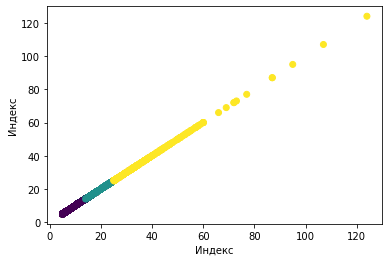

In [13]:
x_axis = df['Индекс']
y_axis = df['Индекс']

plt.xlabel('Индекс')
plt.ylabel('Индекс')
plt.scatter(x_axis, y_axis, c=df['Класс опасности'])
plt.show()

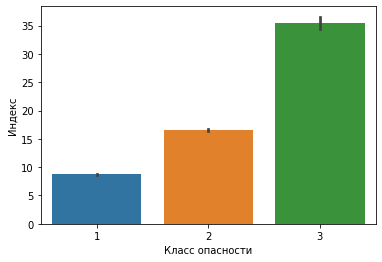

In [14]:
y = df['Индекс']
x = df['Класс опасности']
sns.barplot(x=x, y=y)

Сохраним датасет

In [15]:
df.to_csv('dfMoscow7Cls.csv', index=False)